# Zahra Jalilpour(Zahja096)
**bold text**# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [ ]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [ ]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter, boundary='symm', mode='same')
filterResponseSobelX = signal.convolve2d(image, sobelX, boundary='symm', mode='same')
filterResponseSobelY = signal.convolve2d(image, sobelY, boundary='symm', mode='same')

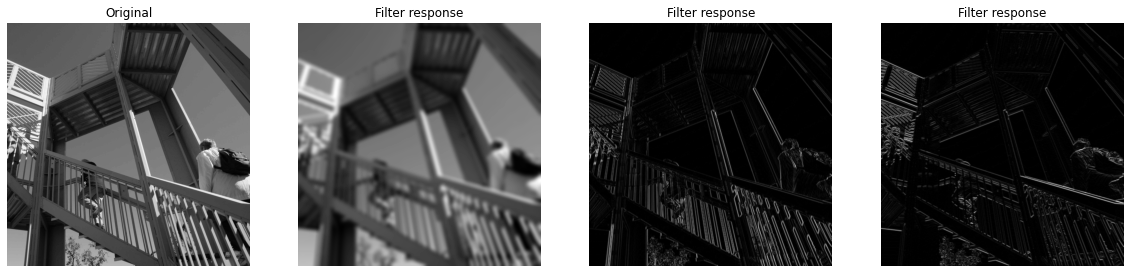

In [ ]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

Answer: As we see the Gaussian filter make the original image to be blur. Based on the kind of Gaussian filter, lowpass filter or highpass filter, it filters high frequencies or low frequencies. Sobel filters is used for edge detection. SlobX emphasise X direction,and SlobY emphasis Y direction.(lecture3 slide 18) 

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

Answer: To see the size of the original image we use image.shape. So we see original shape is (512,512). To see the number of channels, we use len function, or image.ndim, this command gives us 2. so it is Grayscal and has one channel.
Baced on lecture3, slide 10, colour images store red, green and bluevalues(3 channels)


Question 3: What is the size of the different filters?

Answer: Gaussian filter has size(15,15,1). SlobX and SlobY has size(3,3)

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

Answer: if we select mode= same, the output will have the same size as input, which we see here (512,512).

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

Answer: we applied convolve2d function again by selecting mode="valid", as we see the size of response has changed(498,498). in this mode the output consist only of those elements that do not rely on the zero-padding

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?

Answer: When the mode is valid, The valid padding involves no zero padding, so it covers only the valid input, not including artificially generated zeros. The length of output is ((the length of input) - (k-1)) for the kernel size k if the stride s=1.


##  Part 4: How fast is the graphics card?

Question 7: Why are the filters of size 7 x 7 x 3, and not 7 x 7 ? 

Answer: The last dimension is related to the number of channels the filter will have (red, green, blue so 3 channels)

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

Answer: As it is written in the lecture, Conv2D performs 2D convolution over the image, but each filteralso learns how to linearly combine all channels in the input tensor.

In [ ]:
# Your code for checking sizes of image and filter responses
print(image.shape)
print(filterResponseGauss.shape)
print(filterResponseSobelX.shape)
print(filterResponseSobelY.shape)
print(image.ndim)

# change mode to 'valid'
filterResponseGauss_valid = signal.convolve2d(image, gaussFilter, boundary='symm', mode='valid')
print(filterResponseGauss_valid.shape)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
2
(498, 498)


##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [ ]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

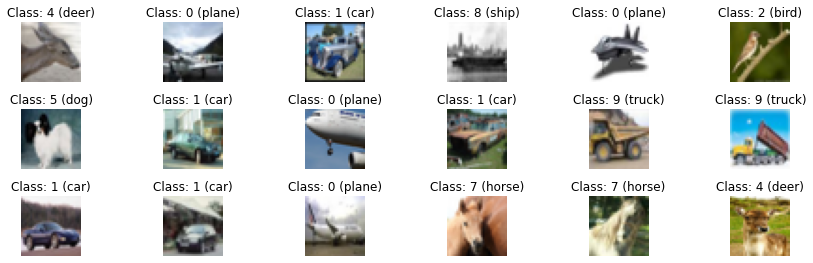

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split


Xtrain, Xval, Ytrain, Yval= train_test_split(Xtrain,Ytrain, test_size=0.25)

# Print the size of training data, validation data and test data
print(Xtrain.shape)
print(Ytrain.shape)
print(Xval.shape)
print(Yval.shape)
print(Xtest.shape)
print(Ytest.shape)

(7500, 32, 32, 3)
(7500, 1)
(2500, 32, 32, 3)
(2500, 1)
(2000, 32, 32, 3)
(2000, 1)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [ ]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [ ]:
from keras.utils import to_categorical

# Print shapes before converting the labels
print('Ytrain shape before "hot encoding" is: {}'.format(Ytrain.shape))
print('Yval shape before "hot encoding" is: {}'.format(Yval.shape))
print('Ytest shape before "hot encoding" is: {}'.format(Ytest.shape))

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain)
Yval = to_categorical(Yval)
Ytest = to_categorical(Ytest)



# Print shapes after converting the labels
print('Ytrain shape after "hot encoding" is: {}'.format(Ytrain.shape))
print('Yval shape after "hot encoding" is: {}'.format(Yval.shape))
print('Ytest shape after "hot encoding" is: {}'.format(Ytest.shape))

Ytrain shape before "hot encoding" is: (7500, 1)
Yval shape before "hot encoding" is: (2500, 1)
Ytest shape before "hot encoding" is: (2000, 1)
Ytrain shape after "hot encoding" is: (7500, 10)
Yval shape after "hot encoding" is: (2500, 10)
Ytest shape after "hot encoding" is: (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):


    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(filters=n_filters, kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):   
        n_filters= 2*n_filters
        model.add(Conv2D(filters=n_filters,kernel_size=(3,3),padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size =(2,2)))
    
    # Add flatten layer
    model.add(Flatten())

    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(n_nodes, activation='relu'))
        model.add(BatchNormalization())
        if use_dropout == True:
            model.add(Dropout(rate=0.5))
        
    # Add final dense layer
    model.add(Dense(10, activation='softmax'))
   
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer= Adam(lr = learning_rate),metrics=['accuracy'])
    
    return model

In [ ]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers


In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape =  (32,32,3)
seed(123)

# Build model
model1 = build_CNN(input_shape=input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain,Ytrain, batch_size=batch_size, verbose=2, validation_data=(Xval,Yval), epochs=epochs)

Epoch 1/20
75/75 - 8s - loss: 2.1607 - accuracy: 0.3597 - val_loss: 1.8010 - val_accuracy: 0.3524
Epoch 2/20
75/75 - 7s - loss: 1.4354 - accuracy: 0.5019 - val_loss: 1.7472 - val_accuracy: 0.3656
Epoch 3/20
75/75 - 7s - loss: 1.2301 - accuracy: 0.5691 - val_loss: 1.4286 - val_accuracy: 0.4892
Epoch 4/20
75/75 - 7s - loss: 1.1237 - accuracy: 0.6016 - val_loss: 1.3673 - val_accuracy: 0.5140
Epoch 5/20
75/75 - 7s - loss: 1.0380 - accuracy: 0.6363 - val_loss: 1.3360 - val_accuracy: 0.5288
Epoch 6/20
75/75 - 7s - loss: 0.9534 - accuracy: 0.6717 - val_loss: 1.2584 - val_accuracy: 0.5716
Epoch 7/20
75/75 - 7s - loss: 0.8939 - accuracy: 0.6927 - val_loss: 1.3530 - val_accuracy: 0.5492
Epoch 8/20
75/75 - 7s - loss: 0.8445 - accuracy: 0.7056 - val_loss: 1.2966 - val_accuracy: 0.5604
Epoch 9/20
75/75 - 7s - loss: 0.8090 - accuracy: 0.7172 - val_loss: 1.3797 - val_accuracy: 0.5708
Epoch 10/20
75/75 - 7s - loss: 0.7613 - accuracy: 0.7359 - val_loss: 1.5155 - val_accuracy: 0.5496
Epoch 11/20
75/75 -

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 12ms/step - loss: 2.1263 - accuracy: 0.5325
Test loss: 2.1263
Test accuracy: 0.5325


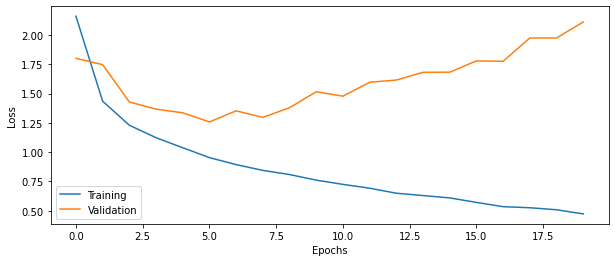

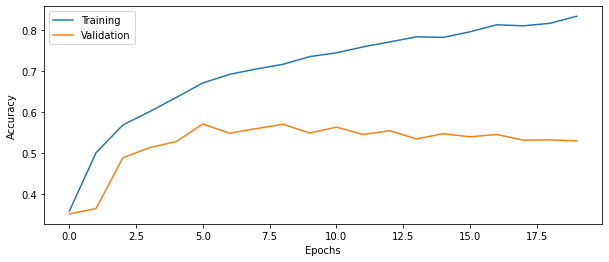

In [ ]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Skip question 12 if you run on a CPU

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 11: How big is the difference between training and test accuracy?

Answer: Difference between test accuracy and train accuracy is approximately 35%

Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'watch nvidia-smi' on the cloud computer during training. 

Question 13: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

Answer: As mensioned in lab1, batch size could not be larger than total number of observations. Here the number of training sample is 7500, so batch size could not be greater than 7500.

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape =  (32,32,3)
seed(123)

# Build model
model2 = build_CNN(input_shape=input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain,Ytrain, batch_size=batch_size, verbose=2, validation_data=(Xval,Yval), epochs=epochs)

Epoch 1/20
75/75 - 8s - loss: 1.6841 - accuracy: 0.3983 - val_loss: 1.9295 - val_accuracy: 0.3244
Epoch 2/20
75/75 - 7s - loss: 1.3078 - accuracy: 0.5304 - val_loss: 1.7682 - val_accuracy: 0.3748
Epoch 3/20
75/75 - 7s - loss: 1.1403 - accuracy: 0.5864 - val_loss: 1.4753 - val_accuracy: 0.4784
Epoch 4/20
75/75 - 7s - loss: 0.9746 - accuracy: 0.6516 - val_loss: 1.3278 - val_accuracy: 0.5372
Epoch 5/20
75/75 - 7s - loss: 0.8448 - accuracy: 0.7019 - val_loss: 1.5281 - val_accuracy: 0.5196
Epoch 6/20
75/75 - 7s - loss: 0.7338 - accuracy: 0.7432 - val_loss: 1.4154 - val_accuracy: 0.5512
Epoch 7/20
75/75 - 7s - loss: 0.5808 - accuracy: 0.7984 - val_loss: 1.5533 - val_accuracy: 0.5596
Epoch 8/20
75/75 - 7s - loss: 0.4726 - accuracy: 0.8405 - val_loss: 1.8407 - val_accuracy: 0.5400
Epoch 9/20
75/75 - 7s - loss: 0.3979 - accuracy: 0.8604 - val_loss: 1.9926 - val_accuracy: 0.5272
Epoch 10/20
75/75 - 7s - loss: 0.3107 - accuracy: 0.8912 - val_loss: 2.0531 - val_accuracy: 0.5412
Epoch 11/20
75/75 -

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 12ms/step - loss: 3.2053 - accuracy: 0.5540
Test loss: 3.2053
Test accuracy: 0.5540


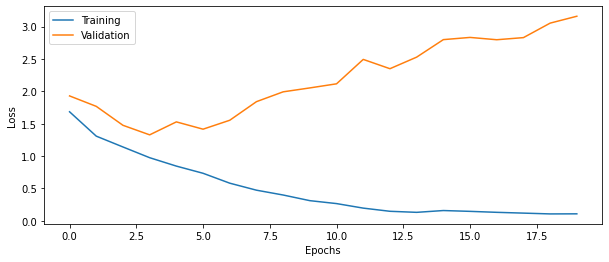

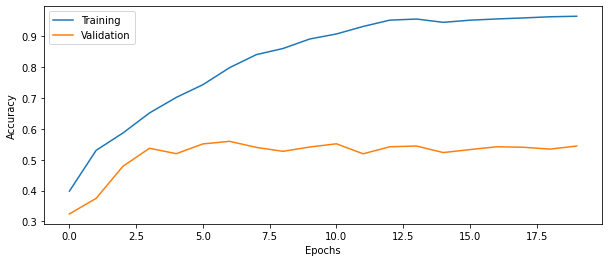

In [ ]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)


In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32,32,3)
seed(123)

# Build model
model3 = build_CNN(input_shape=input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain,Ytrain, batch_size=batch_size, verbose=2, validation_data=(Xval,Yval), epochs=epochs)

Epoch 1/20
75/75 - 12s - loss: 1.7424 - accuracy: 0.3736 - val_loss: 1.9298 - val_accuracy: 0.3812
Epoch 2/20
75/75 - 11s - loss: 1.3658 - accuracy: 0.5028 - val_loss: 1.9396 - val_accuracy: 0.3380
Epoch 3/20
75/75 - 11s - loss: 1.1738 - accuracy: 0.5800 - val_loss: 1.5478 - val_accuracy: 0.4900
Epoch 4/20
75/75 - 11s - loss: 1.0231 - accuracy: 0.6319 - val_loss: 1.4096 - val_accuracy: 0.5236
Epoch 5/20
75/75 - 11s - loss: 0.8644 - accuracy: 0.6957 - val_loss: 1.5701 - val_accuracy: 0.5452
Epoch 6/20
75/75 - 11s - loss: 0.7275 - accuracy: 0.7444 - val_loss: 1.7621 - val_accuracy: 0.5192
Epoch 7/20
75/75 - 11s - loss: 0.5956 - accuracy: 0.7935 - val_loss: 1.7191 - val_accuracy: 0.5608
Epoch 8/20
75/75 - 11s - loss: 0.4398 - accuracy: 0.8484 - val_loss: 1.7034 - val_accuracy: 0.5816
Epoch 9/20
75/75 - 11s - loss: 0.3334 - accuracy: 0.8801 - val_loss: 1.9568 - val_accuracy: 0.5912
Epoch 10/20
75/75 - 11s - loss: 0.2854 - accuracy: 0.9023 - val_loss: 1.9916 - val_accuracy: 0.5796
Epoch 11/

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest, Ytest, batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 [==============================] - 1s 31ms/step - loss: 1.8838 - accuracy: 0.5345
Test loss: 1.8838
Test accuracy: 0.5345


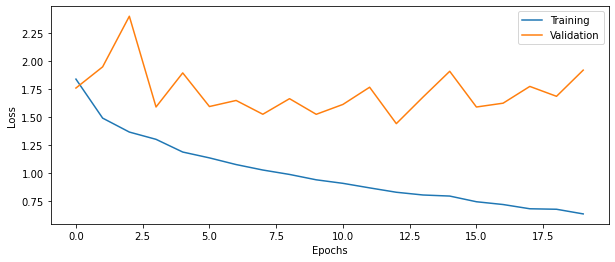

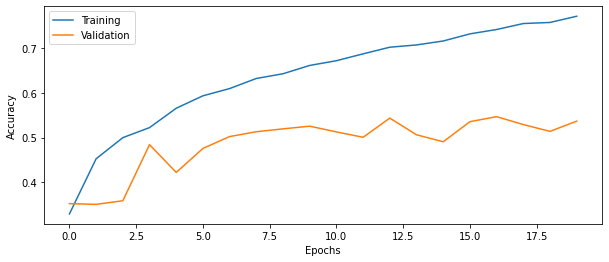

In [ ]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 14: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

Answer:The natwork has 124180 trainable parameters and 4th convolutional layer has the max parameters,73856 param.

Question 15: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

Answer: As it is written in the lecture, every 2D convolutional layer takes 4D tensor and returns another 4D tensor. The 4 dimensions are batch_size, height,width, channels(or batch_size, channels, height,width). A conv2D layer takes as input an image and applies the filter on each color channel and then sums the results.

Question 16: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Answer: Yes, batch size is always first. 4D tensor with shape: batch_shape + (channels, rows, cols) if data_format='channels_first' or 4+D tensor with shape: batch_shape + (rows, cols, channels) if data_format='channels_last'.

Question 17: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

Answer:Number of channel in the output should be 128. 

Question 18: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

Answer:The number of parameters is equal to number of filters (shape of width of the filter height of the filter + 1). So for example in our case, looking at the summary of model 3, the first conv2D layer has 448 parameters because (3x3x3 + 1)*16 = 448.

Question 19: How does MaxPooling help in reducing the number of parameters to train?

Answer:#https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/
 Maximum pooling calculates the maximum value in each patch of each feature map. The results are down sampled that highlight the most present feature in the patch, not the average presence of the feature in the case of average pooling. 

In [ ]:
# Print network architecture

model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)         

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.

Question 20: How much did the test accuracy improve with dropout, compared to without dropout?

Answer: in model3 without dropout, Test accuracy: 0.5345, but when we use dropout, Test accuracy: 0.5665

Question 21: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?

Answer: Usually, regularisation is achieved through the use of techniques like dropout and batch normalisation. If we want to add l2 regularization, we should set kernel_regularizer, bias_regularizer, activity_regularizer. In which kernel: this applies to actual weights of the layer, in Dense it is the W of Wx+b.
bias: this is the bias vector of the weights, so you can apply a different regulariser for it, the b in Wx+b.
activity: is applied to the output vector, the y in y = f(Wx + b)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [30]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32,32,3)

# Build model
model4 = build_CNN(input_shape=input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=True, learning_rate=0.01)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain,Ytrain, batch_size=batch_size, verbose=2, validation_data=(Xval,Yval), epochs=epochs)

Epoch 1/20
75/75 - 12s - loss: 2.0259 - accuracy: 0.2880 - val_loss: 1.9847 - val_accuracy: 0.3056
Epoch 2/20
75/75 - 11s - loss: 1.6293 - accuracy: 0.3924 - val_loss: 1.8355 - val_accuracy: 0.3260
Epoch 3/20
75/75 - 11s - loss: 1.4647 - accuracy: 0.4615 - val_loss: 1.5596 - val_accuracy: 0.4224
Epoch 4/20
75/75 - 11s - loss: 1.3298 - accuracy: 0.5128 - val_loss: 1.4358 - val_accuracy: 0.4944
Epoch 5/20
75/75 - 11s - loss: 1.2292 - accuracy: 0.5556 - val_loss: 1.5290 - val_accuracy: 0.4960
Epoch 6/20
75/75 - 11s - loss: 1.0946 - accuracy: 0.6060 - val_loss: 1.4515 - val_accuracy: 0.5216
Epoch 7/20
75/75 - 11s - loss: 1.0172 - accuracy: 0.6411 - val_loss: 1.4206 - val_accuracy: 0.5476
Epoch 8/20
75/75 - 11s - loss: 0.9223 - accuracy: 0.6768 - val_loss: 1.4559 - val_accuracy: 0.5552
Epoch 9/20
75/75 - 11s - loss: 0.8011 - accuracy: 0.7172 - val_loss: 1.6769 - val_accuracy: 0.5544
Epoch 10/20
75/75 - 11s - loss: 0.7116 - accuracy: 0.7513 - val_loss: 1.5205 - val_accuracy: 0.5428
Epoch 11/

In [31]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest,Ytest,batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 [==============================] - 1s 41ms/step - loss: 2.2854 - accuracy: 0.5665
Test loss: 2.2854
Test accuracy: 0.5665


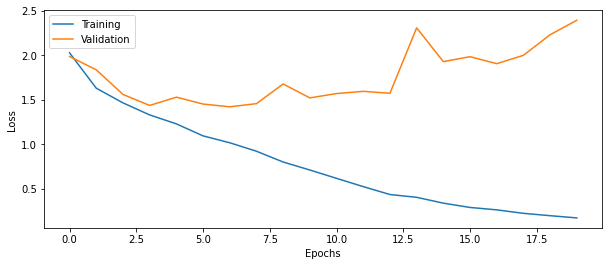

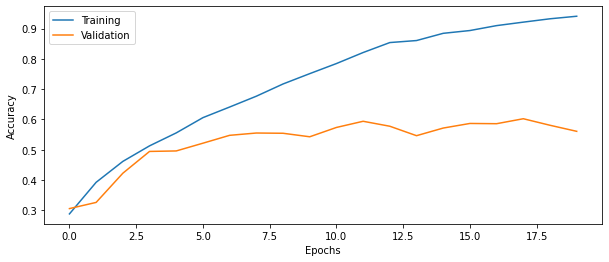

In [32]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 22: How high test accuracy can you obtain? What is your best configuration?

## Your best config


In [36]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32,32,3)
seed(123)
# Build model
model5 = build_CNN(input_shape=input_shape, n_conv_layers=4, n_filters=64, n_dense_layers=2, n_nodes=200, use_dropout=True, learning_rate=0.01)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain,Ytrain, batch_size=batch_size, verbose=2, validation_data=(Xval,Yval), epochs=epochs)


Epoch 1/20
75/75 - 88s - loss: 2.2545 - accuracy: 0.2603 - val_loss: 2.9545 - val_accuracy: 0.2568
Epoch 2/20
75/75 - 86s - loss: 1.7327 - accuracy: 0.3651 - val_loss: 3.6987 - val_accuracy: 0.1668
Epoch 3/20
75/75 - 86s - loss: 1.5677 - accuracy: 0.4265 - val_loss: 1.6793 - val_accuracy: 0.3984
Epoch 4/20
75/75 - 86s - loss: 1.4208 - accuracy: 0.4787 - val_loss: 1.5171 - val_accuracy: 0.4296
Epoch 5/20
75/75 - 86s - loss: 1.2869 - accuracy: 0.5297 - val_loss: 1.5135 - val_accuracy: 0.4588
Epoch 6/20
75/75 - 85s - loss: 1.1715 - accuracy: 0.5773 - val_loss: 1.3730 - val_accuracy: 0.5316
Epoch 7/20
75/75 - 86s - loss: 1.0367 - accuracy: 0.6249 - val_loss: 1.1927 - val_accuracy: 0.5804
Epoch 8/20
75/75 - 86s - loss: 0.9077 - accuracy: 0.6803 - val_loss: 1.2021 - val_accuracy: 0.5976
Epoch 9/20
75/75 - 86s - loss: 0.8038 - accuracy: 0.7183 - val_loss: 1.4599 - val_accuracy: 0.5604
Epoch 10/20
75/75 - 86s - loss: 0.6757 - accuracy: 0.7663 - val_loss: 1.3062 - val_accuracy: 0.6024
Epoch 11/

In [37]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest,Ytest,batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 [==============================] - 4s 213ms/step - loss: 1.7777 - accuracy: 0.6440
Test loss: 1.7777
Test accuracy: 0.6440


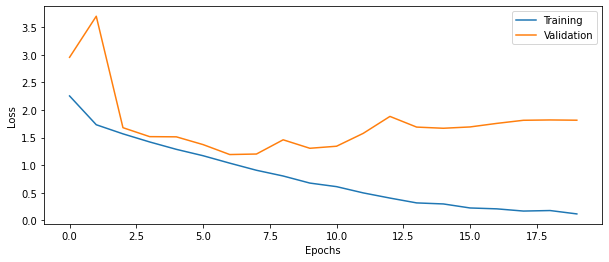

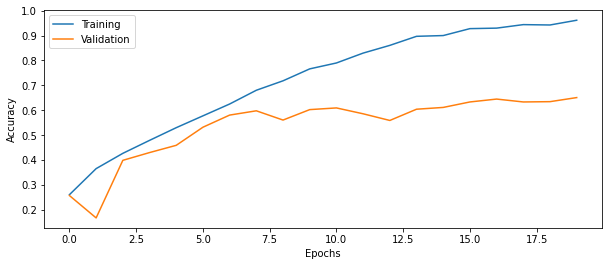

In [38]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 23: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

In [39]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

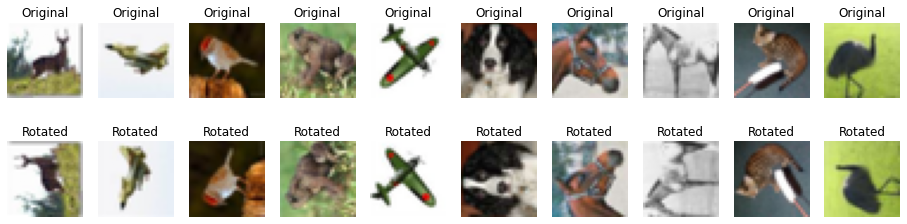

In [40]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()

In [41]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated,Ytest,batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 [==============================] - 4s 214ms/step - loss: 4.7976 - accuracy: 0.2495
Test loss: 4.7976
Test accuracy: 0.2495


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://keras.io/preprocessing/image/ , the `flow` method should be used

Do *NOT* use use_multiprocessing=True here, as it can cause strange errors.

In [42]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [45]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(validation_split=0.2,rotation_range=30,horizontal_flip=True,vertical_flip=True)


# Setup a flow for training data, assume that we can fit all images into CPU memory

gen_train = datagen.flow(Xtrain, Ytrain, batch_size=100,subset= 'training')

# Setup a flow for validation data, assume that we can fit all images into CPU memory
gen_val = datagen.flow(Xtrain, Ytrain,batch_size=100,subset='validation')


## Part 18: What about big data?

Question 24: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

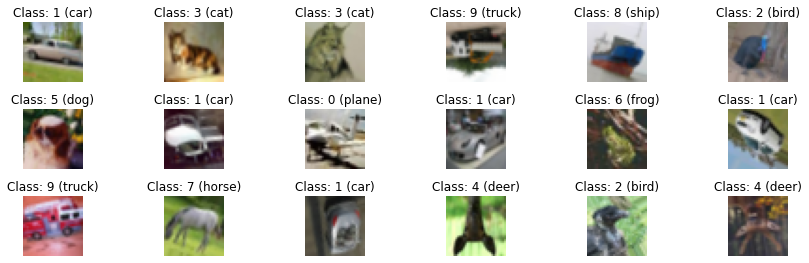

In [46]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

Question 25: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?

Answer:In model5 (without augmentation) training accuracy jumped with less epochs to reach a stable value compared to model6 (with augmentation) training accuracy, which have a more steady increase. Model6 takes more time to train the model. We can add some more data augmentation variables in ImageDataGenerator,like the ones mentioned below.

Question 26: What other types of image augmentation can be applied, compared to what we use here?

Answer: We can use Width Shifting, Height Shifting, Brightness, Shear Intensity, Zoom, Channel Shift, Horizontal Flip. 

In [47]:
#Setup some training parameters
batch_size = 100
epochs = 200
input_shape = (32,32,3)

# Build model (your best config)
model6 = build_CNN(input_shape=input_shape, n_conv_layers=4, n_filters=64, n_dense_layers=2, n_nodes=200, use_dropout=True, learning_rate=0.01)

validation_split=0.2
    
# Train th#e model using on the fly augmentation
history6 = model6.fit_generator(gen_train, steps_per_epoch=len(Xtrain)*(1 - validation_split)/batch_size, validation_data=gen_val,
                                validation_steps=len(Xtrain)*validation_split/batch_size, epochs=epochs)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
80/80 [==============================] - 95s 1s/step - loss: 2.7923 - accuracy: 0.1837 - val_loss: 4.6052 - val_accuracy: 0.1565
Epoch 2/200
80/80 [==============================] - 93s 1s/step - loss: 1.9333 - accuracy: 0.2815 - val_loss: 2.8458 - val_accuracy: 0.1825
Epoch 3/200
80/80 [==============================] - 94s 1s/step - loss: 1.7989 - accuracy: 0.3211 - val_loss: 1.7154 - val_accuracy: 0.3650
Epoch 4/200
80/80 [==============================] - 93s 1s/step - loss: 1.7162 - accuracy: 0.3587 - val_loss: 1.6649 - val_accuracy: 0.3825
Epoch 5/200
80/80 [==============================] - 95s 1s/step - loss: 1.6607 - accuracy: 0.3831 - val_loss: 1.6320 - val_accuracy: 0.3900
Epoch 6/200
80/80 [==============================] - 95s 1s/step - loss: 1.5894 - accuracy: 0.4090 - val_loss: 1.6442 - val_accuracy: 0.4145
Epoch 7/200
80/80 [==============================] - 94s 1s/step - loss: 1.5278 - accuracy: 0.4362 - val_loss: 1.5425 - val_accuracy: 0.4285
Epoch 8/200
8

In [48]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.6842
Test accuracy: 0.6820
Test loss: 4.4495
Test accuracy: 0.3245


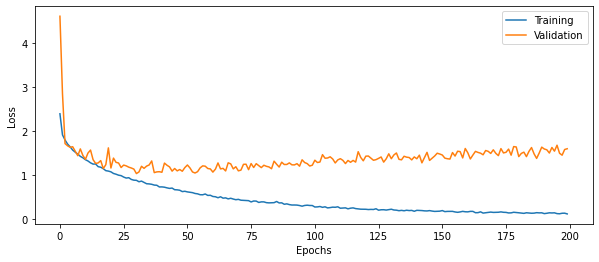

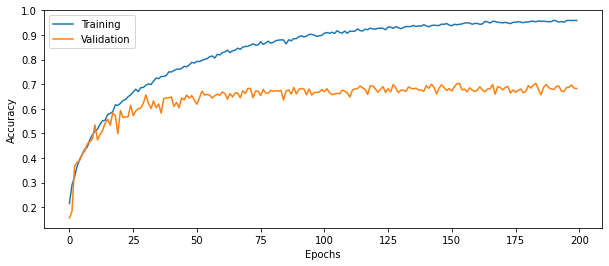

In [49]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [50]:
# Find misclassified images
y_pred = model6.predict_classes(Xtest)
y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


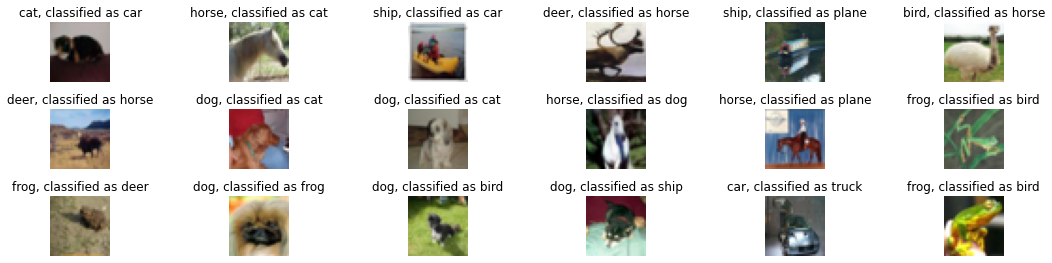

In [51]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 27: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

Answer: As the input shape is 32*32, it can't be applied image of another size.because we define a CNN architecture and how many layers we have depending on the input size.

Question 28: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

Answer: #https://datascience.stackexchange.com/questions/40462/how-to-prepare-the-varied-size-input-in-cnn-prediction
we resize the images to the size of the smallest images with the help of any image manipulation library (OpenCV, PIL etc) or some times, pad the images of unequal size to desired size. Resizing the image is simpler and is used most often.

Part 22: Pre-trained 2D CNNs
There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using model.summary()

Question 29: How many convolutional layers does ResNet50 have?

Answer: It has 48 convolutional layers.

Question 30: How many trainable parameters does the ResNet50 network have?

Answer:25,583,592

Question 31: What is the size of the images that ResNet50 expects as input?

Answer: 224*224

Question 32: Using the answer to question 30, explain why the second derivative is seldom used when training deep networks.

Answer: It is difficult to find gradient and hessian for the complex networks(When we have a large number of trainable parameters)

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function

Useful functions

image.load_img in keras.preprocessing

image.img_to_array in keras.preprocessing

ResNet50 in keras.applications.resnet50

preprocess_input in keras.applications.resnet50

decode_predictions in keras.applications.resnet50

expand_dims in numpy

In [2]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import img_to_array
import numpy as np
from numpy import expand_dims

def image_pred(path):
    
  #ResNet50 model
    model = ResNet50(weights='imagenet')
  
  #load image
    original_image = image.load_img(path,target_size=(224,224)) #needs target size to resize the image we load
  #convert to numpy arrays
    original_image = img_to_array(original_image)

  #add extra dimension for the number of images
    original_image=np.expand_dims(original_image, axis=0) #used to add the number of images
    original_image= preprocess_input(original_image)

  #predictions
    prediction = model.predict(original_image)
  #list of tuples (class, description, probability)
    print('Predicted classes:', decode_predictions(prediction, top=3))



In [3]:
model = ResNet50(weights='imagenet')
model.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [5]:
from google.colab import drive
drive.mount('/content/drive/')
import cv2 as cv


Mounted at /content/drive/


In [11]:
dog_pred = image_pred('/content/drive/My Drive/dog.png')
horse_pred= image_pred('/content/drive/My Drive/horse.png')
tiger_pred= image_pred('/content/drive/My Drive/tiger.png')
flower_pred= image_pred('/content/drive/My Drive/flower.png')
bee_pred= image_pred('/content/drive/My Drive/bee.png')

Predicted classes: [[('n02093754', 'Border_terrier', 0.23584251), ('n02106662', 'German_shepherd', 0.18857524), ('n02096051', 'Airedale', 0.1334302)]]
Predicted classes: [[('n02389026', 'sorrel', 0.7929024), ('n02422106', 'hartebeest', 0.09537291), ('n02437312', 'Arabian_camel', 0.07492197)]]
Predicted classes: [[('n02129604', 'tiger', 0.67295194), ('n02123159', 'tiger_cat', 0.31876644), ('n02128925', 'jaguar', 0.0050795865)]]
Predicted classes: [[('n02206856', 'bee', 0.2532572), ('n02281406', 'sulphur_butterfly', 0.09727556), ('n02276258', 'admiral', 0.08268758)]]
Predicted classes: [[('n02206856', 'bee', 0.9905414), ('n03530642', 'honeycomb', 0.0023101112), ('n02190166', 'fly', 0.0022437992)]]
